<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/Lab_Work_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification** of the Instant Liking of a Deodrant based on the given 60 features. Some of them are:

1.) Personal Opinion of People

---


2.) Strength of Deodrant

---


3.) Bottles Owned by people

---


4.) Artificial Chemical used in the Deodrant.

In [ ]:
import numpy as np  #helps in mathematical operations
import matplotlib.pyplot as plt #helps in plotting of graph
import pandas as pd #helps in making dataframes and importing csv files

In [ ]:
from google.colab import drive #connect with google drive

In [ ]:
drive.mount('/content/drive')   # mount the drive on colab using authentication

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [ ]:
#Reading the csv file
dataset=pd.read_csv("Data_train_reduced.csv")
print(dataset)

      Respondent.ID  ...  s13b.bottles.of.Deodorant.do.you.currently.own
0              3800  ...                                               3
1              3801  ...                                               4
2              3802  ...                                               2
3              3803  ...                                               3
4              3804  ...                                               3
...             ...  ...                                             ...
2495           5695  ...                                               3
2496           5696  ...                                               2
2497           5697  ...                                               5
2498           5698  ...                                               4
2499           5699  ...                                               1

[2500 rows x 64 columns]


In [ ]:
#Seeing the shape of the dataset
dataset.shape

(2500, 64)

In [ ]:
#Seeing the overall values of the features.
dataset.describe()

,Respondent.ID,Product.ID,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,q4_5.casual,q4_6.cheap,q4_7.clean,q4_8.easy.to.wear,q4_9.elegant,q4_10.feminine,q4_11.for.someone.like.me,q4_12.heavy,q4_13.high.quality,q4_14.long.lasting,q4_15.masculine,q4_16.memorable,q4_17.natural,q4_18.old.fashioned,q4_19.ordinary,q4_20.overpowering,q4_21.sharp,q4_22.sophisticated,q4_23.upscale,q4_24.well.rounded,q5_1.Deodorant.is.addictive,q7,q8.1,q8.2,q8.5,q8.6,q8.7,q8.8,q8.9,q8.10,q8.11,q8.12,q8.13,q8.17,q8.18,q8.19,q8.20,q9.how.likely.would.you.be.to.purchase.this.Deodorant,q10.prefer.this.Deodorant.or.your.usual.Deodorant,q11.time.of.day.would.this.Deodorant.be.appropriate,q12.which.occasions.would.this.Deodorant.be.appropriate,Q13_Liking.after.30.minutes,q14.Deodorant.overall.on.a.scale.from.1.to.10,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
count,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,1500.000000,2500.000000,2500.000000,2000.000000,500.000000,500.00000,500.00000,2500.000000,2000.000000,2500.000000,500.000000,1000.00000,2500.000000,1500.000000,2500.000000,2500.000000,2500.000000,2500.0000,2500.000000,2500.000000,2500.000000,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,8249.500000,460.400000,0.24720,5.129600,1.121200,3.344400,2.500000,3.71680,3.546000,2.241600,3.487200,2.347600,3.788800,3.750800,3.628400,4.016400,3.558400,2.808800,3.682800,4.002800,2.078400,3.826400,3.467200,2.62880,2.860000,2.978800,3.332400,3.635200,3.527600,3.648000,3.336400,1.400000,0.047200,0.064000,0.053200,0.048800,0.041500,0.112000,0.07800,0.11400,0.020800,0.062500,0.038400,0.106000,0.06100,0.005200,0.052667,3.590000,2.826400,2.318000,2.1948,4.959600,6.746800,3.522400,4.0,1.665200,3.199200,4.996000,1.742000,1.898000,0.025296,0.038400,3.072000
std,3433.008516,308.412528,0.43147,1.481918,0.934055,0.743243,1.384618,1.27548,1.261951,1.242838,1.276906,1.312198,1.209289,1.305596,1.260376,1.200295,1.367969,1.474419,1.219992,1.102397,1.272203,1.163789,1.278428,1.40876,1.301491,1.426031,1.306673,1.270735,1.281365,1.197276,1.319064,1.264848,0.212109,0.244835,0.224477,0.215493,0.199493,0.315682,0.26844,0.31813,0.142743,0.242122,0.192198,0.308146,0.23945,0.071938,0.223442,1.396668,1.397514,0.804696,0.8492,1.769073,2.505274,1.964241,0.0,1.036889,0.970307,2.371125,0.726944,1.440426,0.104856,0.192198,1.620082
min,3800.000000,121.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,4.0,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,5324.750000,230.000000,0.00000,5.000000,0.000000,3.000000,1.000000,3.00000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,1.00000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,2.00

In [ ]:
#Getting separate values of features
personal_opinion = dataset.iloc[0:dataset.shape[0],4:5]
bottles = dataset.iloc[0:dataset.shape[0],-1]
strength = dataset.iloc[0:dataset.shape[0],6:7]
artificial_chemical = dataset.iloc[0:dataset.shape[0],7:8]
instant_liking=dataset.iloc[0:dataset.shape[0],3:4]

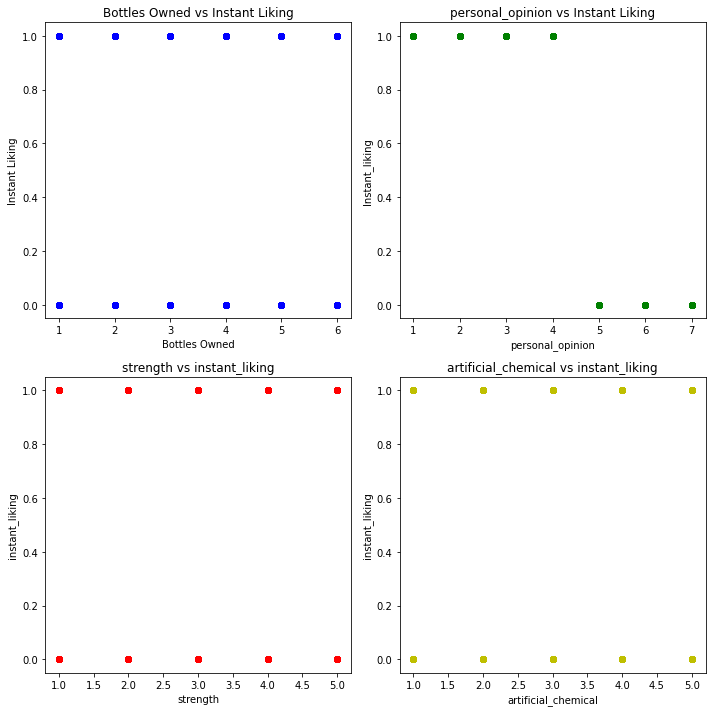

In [ ]:
#plotting graphs of features vs the classification value to visualize the effect of features.
fig,axes = plt.subplots(figsize=(10,10),nrows=2,ncols=2)

axes[0][0].scatter(bottles,instant_liking,color='b')
axes[0][0].set_xlabel("Bottles Owned")
axes[0][0].set_ylabel("Instant Liking")
axes[0][0].set_title("Bottles Owned vs Instant Liking")

axes[0][1].scatter(personal_opinion,instant_liking,color='g')
axes[0][1].set_xlabel("personal_opinion")
axes[0][1].set_ylabel("Instant_liking")
axes[0][1].set_title("personal_opinion vs Instant Liking")

axes[1][0].scatter(strength,instant_liking,color='r')
axes[1][0].set_xlabel("strength")
axes[1][0].set_ylabel("instant_liking")
axes[1][0].set_title("strength vs instant_liking")

axes[1][1].scatter(artificial_chemical,instant_liking,color='y')
axes[1][1].set_xlabel("artificial_chemical")
axes[1][1].set_ylabel("instant_liking")
axes[1][1].set_title("artificial_chemical vs instant_liking")

plt.tight_layout()

In [ ]:
# replacing the nan values in the dataset with the mean of that column
dataset=dataset.fillna(dataset.mean())

In [ ]:
#Creating the feature matrix
X=dataset.iloc[:,4:]
X

,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,q4_5.casual,q4_6.cheap,q4_7.clean,q4_8.easy.to.wear,q4_9.elegant,q4_10.feminine,q4_11.for.someone.like.me,q4_12.heavy,q4_13.high.quality,q4_14.long.lasting,q4_15.masculine,q4_16.memorable,q4_17.natural,q4_18.old.fashioned,q4_19.ordinary,q4_20.overpowering,q4_21.sharp,q4_22.sophisticated,q4_23.upscale,q4_24.well.rounded,q5_1.Deodorant.is.addictive,q7,q8.1,q8.2,q8.5,q8.6,q8.7,q8.8,q8.9,q8.10,q8.11,q8.12,q8.13,q8.17,q8.18,q8.19,q8.20,q9.how.likely.would.you.be.to.purchase.this.Deodorant,q10.prefer.this.Deodorant.or.your.usual.Deodorant,q11.time.of.day.would.this.Deodorant.be.appropriate,q12.which.occasions.would.this.Deodorant.be.appropriate,Q13_Liking.after.30.minutes,q14.Deodorant.overall.on.a.scale.from.1.to.10,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
0,4,1,4,2,5,4,2,3,5,5,5,4,5,3,1,5,1,2,4,5,4,5,1,1,4,1,4,1,1,0,0.000,0,0,0.0415,1.000,0.078,0.114,0,0.0,0,0.106,0.061,0,0.000000,2,1,1,2,1,7,7,4,1,4,3,1,1,0.0,0,3
1,5,1,4,4,2,2,1,3,2,4,4,4,3,1,1,3,4,4,5,3,3,4,2,2,5,4,4,4,4,0,0.000,0,1,0.0415,0.000,0.078,0.114,0,0.0,0,0.106,0.061,0,0.000000,3,5,3,3,3,8,6,4,1,4,3,1,1,0.0,0,4
2,6,1,3,2,5,2,4,2,4,3,5,4,4,4,3,1,2,1,4,2,4,3,2,5,4,4,3,4,3,0,0.000,0,0,0.0415,0.000,0.078,0.114,0,0.0,0,0.106,0.061,0,0.000000,5,1,3,3,2,5,7,4,1,3,5,1,1,0.0,0,2
3,4,0,4,5,5,4,3,5,2,5,3,5,5,5,1,4,3,3,5,5,4,2,5,3,3,5,4,4,3,0,0.000,0,0,0.0415,0.000,0.078,0.114,0,0.0,0,0.106,0.061,0,0.000000,5,4,1,3,6,8,1,4,1,4,9,1,3,0.0,0,3
4,4,1,2,1,3,1,1,3,3,5,3,5,5,5,1,4,4,2,3,5,1,2,4,2,3,1,5,3,2,0,0.000,0,0,0.0415,0.000,0.078,0.114,0,0.0,0,0.106,0.061,0,0.000000,5,3,3,2,5,4,4,4,1,3,5,1,2,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6,1,3,4,5,4,5,3,3,3,5,5,4,3,5,4,5,1,5,1,1,1,2,5,4,2,5,3,0,0,0.064,0,0,0.0000,0.112,0.078,0.000,0,0.0,0,0.106,0.000,0,0.052667,4,1,3,2,7,10,6,4,4,3,4,2,6,0.0,0,3
2496,5,0,3,1,4,1,5,2,1,5,4,5,4,4,3,3,2,1,4,5,5,3,2,3,2,4,1,4,0,0,0.064,0,0,1.0000,0.112,0.078,0.000,0,0.0,1,0.106,0.000,0,0.052667,4,3,3,3,7,6,3,4,1,2,9,2,1,0.0,0,2
2497,4,2,3,3,5,4,1,3,1,3,1,5,5,1,3,5,4,1,4,3,4,5,1,5,4,5,4,5,3,0,0.064,0,0,0.0000,0.112,0.078,0.000,0,0.0,0,0.106,0.000,0,0.052667,2,1,1,3,6,3,7,4,5,4,6,1,1,0.0,0,5
2498,5,2,4,2,3,4,1,2,5,3,5,3,4,5,5,5,5,1,3,2,2,5,2,3,5,3,3,3,3,0,0.064,0,0,0.0000,0.112,0.078,1.000,0,0.0,0,0.106,0.000,0,0.052667,2,3,3,3,1,7,2,4,1,3,5,3,2,0.0,0,4


In [ ]:
#creating the output variable matrix
Y=dataset.iloc[:,3]
Y

0       1
1       0
2       0
3       1
4       1
       ..
2495    0
2496    0
2497    1
2498    0
2499    0
Name: Instant.Liking, Length: 2500, dtype: int64

In [ ]:
#importing the training and testing dataset split feature from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
#Dividing the dataset in test and train datasets.
X=np.array(X)
Y=np.array(Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
#Seeing the shapes of each
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1875, 60)
(625, 60)
(1875,)
(625,)


In [ ]:
#importing the KNN classifier model from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Model evaluation with K = 3
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#fit the model with the given training dataset
knn_3.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Testing the model
prediction_model_3 = knn_3.predict(X_test)

In [ ]:
#Used to calculate different metrics of performance
from sklearn import metrics

In [ ]:
#Making the confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test,prediction_model_3)
conf_matrix

array([[459,  22],
       [ 80,  64]])

In [ ]:
#Calculating the accuracy, precision and recall of the model
print("Accuracy of the model is:",metrics.accuracy_score(Y_test, prediction_model_3))
print("Precision of the model is:",metrics.precision_score(Y_test, prediction_model_3))
print("Recall of the model is:",metrics.recall_score(Y_test, prediction_model_3))

Accuracy of the model is: 0.8368
Precision of the model is: 0.7441860465116279
Recall of the model is: 0.4444444444444444


In [ ]:
#Now let's take K = 5 and check the performance of the model
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,Y_train)
prediction_model_5 = knn_5.predict(X_test)
#Calculating confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test,prediction_model_5)
print(conf_matrix)
#Calculating the accuracy, precision and recall of the model
print("Accuracy of the model is:",metrics.accuracy_score(Y_test, prediction_model_5))
print("Precision of the model is:",metrics.precision_score(Y_test, prediction_model_5))
print("Recall of the model is:",metrics.recall_score(Y_test, prediction_model_5))

[[467  14]
 [ 88  56]]
Accuracy of the model is: 0.8368
Precision of the model is: 0.8
Recall of the model is: 0.3888888888888889


In [ ]:
#Now let's check for k=11
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train,Y_train)
prediction_model_11 = knn_11.predict(X_test)
#Calculating confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test,prediction_model_11)
print(conf_matrix)
#Calculating the accuracy, precision and recall of the model
print("Accuracy of the model is:",metrics.accuracy_score(Y_test, prediction_model_11))
print("Precision of the model is:",metrics.precision_score(Y_test, prediction_model_11))
print("Recall of the model is:",metrics.recall_score(Y_test, prediction_model_11))


[[479   2]
 [ 86  58]]
Accuracy of the model is: 0.8592
Precision of the model is: 0.9666666666666667
Recall of the model is: 0.4027777777777778


In [ ]:
#Now let's check for k=15
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train,Y_train)
prediction_model_15 = knn_15.predict(X_test)
#Calculating confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test,prediction_model_15)
print(conf_matrix)
#Calculating the accuracy, precision and recall of the model
print("Accuracy of the model is:",metrics.accuracy_score(Y_test, prediction_model_15))
print("Precision of the model is:",metrics.precision_score(Y_test, prediction_model_15))
print("Recall of the model is:",metrics.recall_score(Y_test, prediction_model_15))


[[480   1]
 [ 88  56]]
Accuracy of the model is: 0.8576
Precision of the model is: 0.9824561403508771
Recall of the model is: 0.3888888888888889


In [ ]:
#Now let's check for k=21
knn_21 = KNeighborsClassifier(n_neighbors=21)
knn_21.fit(X_train,Y_train)
prediction_model_21 = knn_21.predict(X_test)
#Calculating confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test,prediction_model_21)
print(conf_matrix)
#Calculating the accuracy, precision and recall of the model
print("Accuracy of the model is:",metrics.accuracy_score(Y_test, prediction_model_21))
print("Precision of the model is:",metrics.precision_score(Y_test, prediction_model_21))
print("Recall of the model is:",metrics.recall_score(Y_test, prediction_model_21))

[[481   0]
 [ 97  47]]
Accuracy of the model is: 0.8448
Precision of the model is: 1.0
Recall of the model is: 0.3263888888888889


In [ ]:
#Now let's check for k=23
knn_23 = KNeighborsClassifier(n_neighbors=23)
knn_23.fit(X_train,Y_train)
prediction_model_23 = knn_23.predict(X_test)
#Calculating confusion matrix
conf_matrix = metrics.confusion_matrix(Y_test,prediction_model_23)
print(conf_matrix)
#Calculating the accuracy, precision and recall of the model
print("Accuracy of the model is:",metrics.accuracy_score(Y_test, prediction_model_23))
print("Precision of the model is:",metrics.precision_score(Y_test, prediction_model_23))
print("Recall of the model is:",metrics.recall_score(Y_test, prediction_model_23))


[[481   0]
 [ 96  48]]
Accuracy of the model is: 0.8464
Precision of the model is: 1.0
Recall of the model is: 0.3333333333333333


As we can see here if we increase the K value initially the accuracy of the model increases but after reaching 20 they accuracy has started decreasing.